In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [ ]:
codes = ["Agriculture, Forestry, Fishing and Hunting", "Mining, Quarrying, and Oil and Gas Extraction", "Utilities", "Construction", "Manufacturing", "Manufacturing", "Manufacturing",
         "Wholesale Trade", "Retail Trade", "Retail Trade", "Transportation and Warehousing", "Transportation and Warehousing", "Information", "Finance and Insurance",
         "Real Estate and Rental and Leasing", "Professional, Scientific, and Technical Services", "Management of Companies and Enterprises",
         "Administrative and Support and Waste Management and Remediation Services", "Educational Services", "Health Care and Social Assistance",
         "Arts, Entertainment, and Recreation", "Accommodation and Food Services", "Other Services", "Public Administration"]
nums = ['11', '21', '22', '23', '31', '32', '33', '42', '44', '45', '48', '49', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81', '92']

In [ ]:
#relevant function for getting data
def get_filtered_df(topic):
  file = topic + "/gpt4_filtered_data_" + topic + ".csv"
  df = pd.read_csv(file)
  return df

def get_orig_df(topic):
  file = topic + "/data_" + topic + ".csv"
  df = pd.read_csv(file)
  return df

In [ ]:
data_path = "./repo_by_topic/"
os.chdir(data_path)

#Going through all of the filtered data for accuracy/info about openai labels
#total num of repos per code
total = dict()

#% of non labeled repos
empty = dict()
rest = dict()

#% of single label repos
ones = dict()

#% of multiple labeled repos with actual code in the list
correct = dict()
incorrect = dict()

temp = []

#gets all of the necessary plots for repos
for (i, cnum) in enumerate(nums):
  code = codes[i]
  curr = get_filtered_df(code)

  empty[cnum] = list()
  rest[cnum] = list()
  ones[cnum] = list()
  correct[cnum] = list()
  incorrect[cnum] = list()
  total[cnum] = 0

  for (i, row) in tqdm(enumerate(curr.iterrows()), desc=code):
    openai = row[1][curr.columns.get_loc("openai labels")][1:-1].split(", ")
    openai = [x[1:-1] for x in openai]

    if len(openai) == 1 and openai[0] == '':
      openai = []

    if len(openai) == 0:
      empty[cnum].append(row[1])
    elif len(openai) == 1:
      ones[cnum].append(row[1])
      if code == "Manufacturing":
        ind = [x for i, x in enumerate(my_list) if x == "Manufacturing"]
        if_corr = False
        for i in ind:
          if cnum in openai:
            if_corr = True
        if if_corr == True:
          correct[cnum].append(row[1])
        else:
          incorrect[cnum].append(row[1])
      elif code == "Retail Trade":
        ind = [i for i, x in enumerate(my_list) if x == "Retail Trade"]
        if_corr = False
        for i in ind:
          if cnum in openai:
            if_corr = True
        if if_corr == True:
          correct[cnum].append(row[1])
        else:
          incorrect[cnum].append(row[1])
      elif code == "Transporation and Warehousing":
        ind = [i for i, x in enumerate(my_list) if x == "Transporation and Warehousing"]
        if_corr = False
        for i in ind:
          if cnum in openai:
            if_corr = True
        if if_corr == True:
          correct[cnum].append(row[1])
        else:
          incorrect[cnum].append(row[1])
      elif cnum not in openai:
        incorrect[cnum].append(row[1])
      else:
        correct[cnum].append(row[1])
    else:
      rest[cnum].append(row[1])
      if cnum not in openai:
        incorrect[cnum].append(row[1])
      else:
        correct[cnum].append(row[1])


    total[cnum] += 1

In [ ]:
#data_path = "/content/drive/My Drive/[Fall 23] DC-Github/data/EDA/Lengths vs. Labeling"
#os.chdir(data_path)

In [ ]:
bar_lengths_empty = []
bar_lengths_non = []

empty_perc = dict()
ones_perc = dict()
rest_perc = dict()
corr_perc = dict()

#looking at non-labeled %s
for n in nums:
  code = codes[nums.index(n)]

  ecount = len(empty[n])
  ocount = len(ones[n])
  rcount = len(rest[n])
  tot = total[n]
  empty_perc[n] = ecount / tot
  ones_perc[n] = ocount / tot
  rest_perc[n] = rcount / tot

  corrlen = len(correct[n])
  incorrlen = len(incorrect[n])
  corr_perc[n] = (corrlen / (corrlen + incorrlen), incorrlen / (corrlen + incorrlen))

  maxb = 0
  for repo in empty[n]:
    if not isinstance(repo[6], float):
      readme_len = len(repo[6])
      if readme_len > maxb:
        maxb = readme_len
    else:
      readme_len = 0
    bar_lengths_empty.append(readme_len)

  for repo in rest[n]:
    readme = 0
    if not isinstance(repo[6], float):
      readme_len = len(repo[6])
      if readme_len > maxb:
        maxb = readme_len
    else:
      readme_len = 0
    bar_lengths_non.append(readme_len)

  for repo in ones[n]:
    readme = 0
    if not isinstance(repo[6], float):
      readme_len = len(repo[6])
      if readme_len > maxb:
        maxb = readme_len
    else:
      readme_len = 0
    bar_lengths_non.append(readme_len)

  bins = []
  if maxb > 50:
    bins = np.arange(0, maxb, maxb // 20)
  else:
    bins = np.arange(0, maxb)


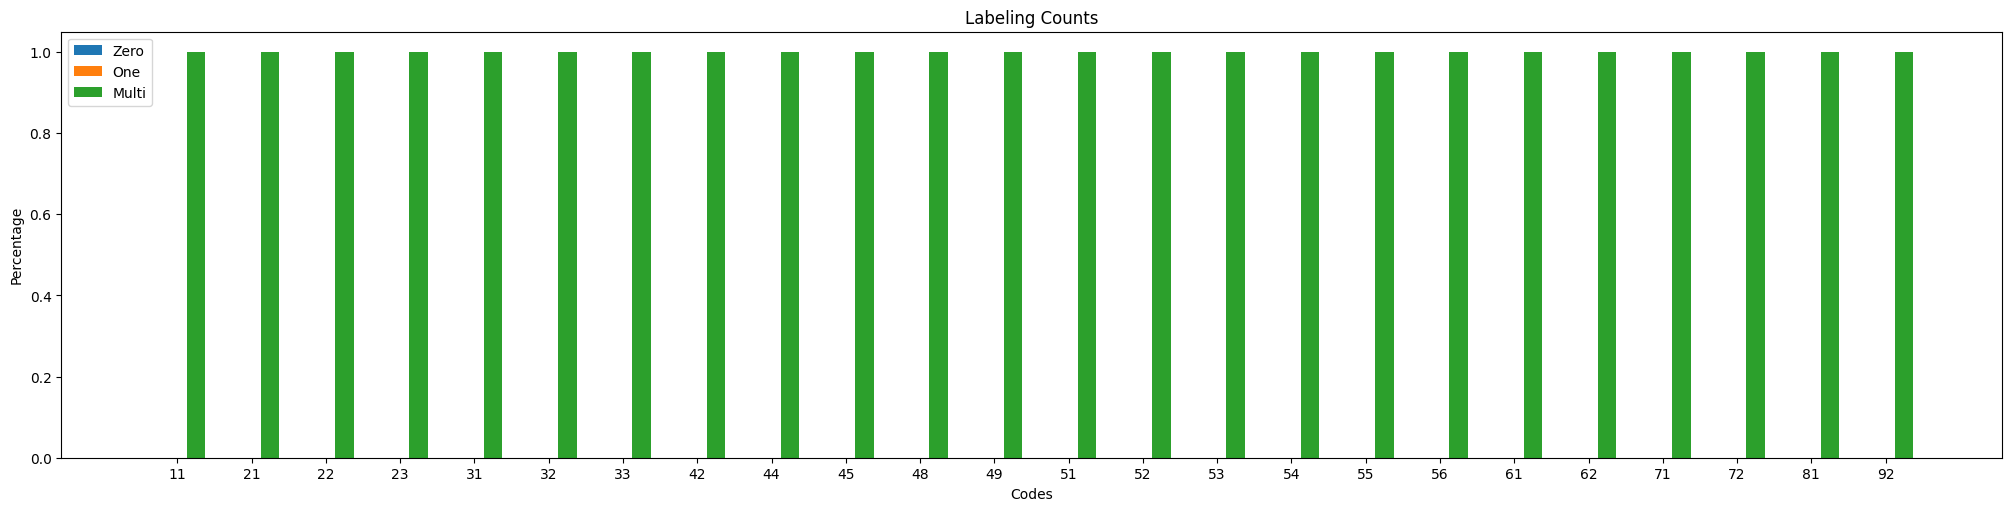

<Figure size 640x480 with 0 Axes>

In [ ]:
#Looking at what repos were multi-labeled, single-labeled, or not labeled at all
#data_path = "/content/drive/My Drive/[Fall 23] DC-Github/data/EDA/"
#os.chdir(data_path)

x = np.arange(len(nums))
labels = ["Zero", "One", "Multi"]
fig, ax = plt.subplots(figsize=(20,5), layout="constrained")

bar_empty = plt.bar(x, empty_perc.values(), width=0.25, label=labels[0])
bar_ones = plt.bar(x + 0.25, ones_perc.values(), width=0.25, label=labels[1])
bar_rest = plt.bar(x + 0.5, rest_perc.values(), width=0.25, label=labels[2])

ax.set_xticks(x + 0.25, nums)
plt.title('Labeling Counts')
plt.xlabel("Codes")
plt.ylabel("Percentage")

plt.legend(labels)

plt.show()
plt.savefig('Labeling Counts.png')

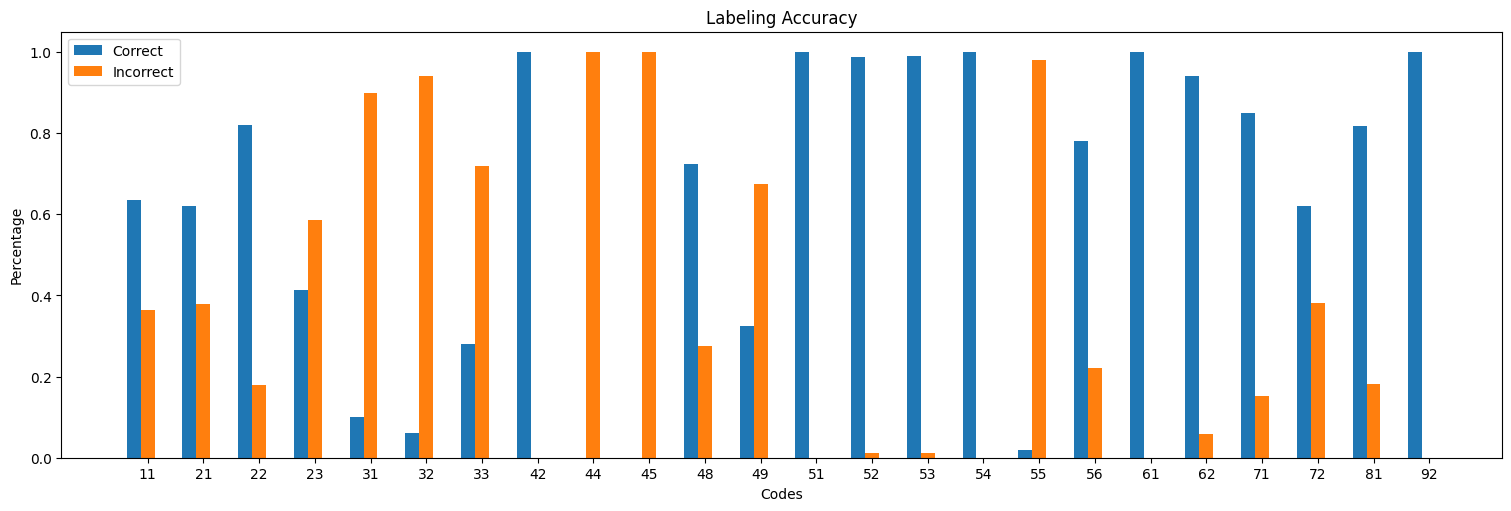

<Figure size 640x480 with 0 Axes>

In [ ]:
#Looking at the accuracy of the labeling
x = np.arange(len(nums))
labels = ["Correct", "Incorrect"]
fig, ax = plt.subplots(figsize=(15,5), layout="constrained")

bar_empty = plt.bar(x, [x[0] for x in corr_perc.values()], width=0.25, label=labels[0])
bar_ones = plt.bar(x + 0.25, [x[1] for x in corr_perc.values()], width=0.25, label=labels[1])

ax.set_xticks(x + 0.25, nums)
plt.title('Labeling Accuracy')
plt.xlabel("Codes")
plt.ylabel("Percentage")

plt.legend(labels)

plt.show()
plt.savefig('Labeling Accuracy.png')